In [1]:
from pandas import HDFStore
import pandas
import seaborn

In [3]:
# %load compare.py
from pandas import HDFStore
from utils import dask_cov
from PyAI import *


with HDFStore('test.hdf5') as f:
    Close = f.Close
    close = Close.as_matrix()
    open = f.Open.as_matrix()
    names = f.Close.columns.tolist()

    var = close - open
    var -= var.mean(axis=0)
    var /= var.std(axis=0)
    var = var.T

    # Create unsupervised labels
    labels = cluster.AffinityPropagation(0.7).fit_predict(dask_cov(var))
    brain = Brain(var, labels)

brain.init_data_transformation(TRANSFORMATION.Standardize(), TRANSFORMATION.PCA.RandomizedPCA())
brain.init_naive_bayes(NAIVE_BAYES.REGULAR)



Refitting models
Done Refitting

Start Naive Bayes
Time to complete Naive Bayes was:	0.08s


True

In [4]:
import numpy as np
names = np.array(names)

In [6]:
brain

n_samples:      478
n_features:     1258
n_classes:      37
regression:     False
classification: True
E_cluster:      False
E_knn:          False
E_svm:          False
E_gmm:          False

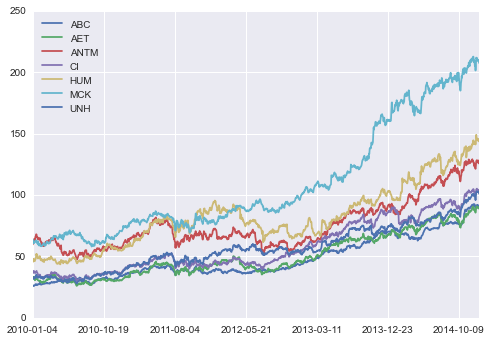

In [139]:
Close[names[brain.get_label() == 1]].plot()

In [120]:
average = []
for label in np.unique(brain.get_label()):
    s = Close[names[brain.get_label() == label]].as_matrix()
    dif = s[1:] - s[:-1]
    dif = ((dif - dif.mean(0)) / dif.std(0))
    dif = ((dif - (np.tile((dif.sum(1) / dif.shape[1]), (dif.shape[1],1)).T)).sum(1) / dif.shape[1]).sum() / dif.shape[0]
    average.append([label, dif])

In [121]:
average

[[0, 4.2706289956064584e-19],
 [1, 1.3425919844757418e-18],
 [2, 1.6921042694211508e-18],
 [3, 1.18726805919617e-18],
 [4, -7.2984956336698879e-19],
 [5, 0.0],
 [6, 3.3505161715373157e-18],
 [7, 9.7845580307681491e-19],
 [8, -1.7504954816681517e-18],
 [9, -1.316568175085023e-18],
 [10, 1.6243194361373922e-18],
 [11, 4.0955652471198337e-19],
 [12, 2.1390782718886648e-18],
 [13, 1.2753966685615708e-19],
 [14, -9.2187373265911474e-19],
 [15, -1.260864318620595e-19],
 [16, -4.0396049576957441e-19],
 [17, 3.0100872861931921e-18],
 [18, 4.5755574260947523e-18],
 [19, 9.6493130819648661e-19],
 [20, -2.0914336713627269e-18],
 [21, 3.3914113692489362e-18],
 [22, -1.4122516762791878e-19],
 [23, -1.3299546649155522e-18],
 [24, 4.6506640205047391e-18],
 [25, 6.9362652362920036e-18],
 [26, -3.5617848761829435e-19],
 [27, -2.542168021510695e-18],
 [28, -2.8231233020603726e-18],
 [29, -2.9449127585082265e-18],
 [30, -1.3989465740421251e-18],
 [31, 7.8144032477203167e-19],
 [32, 7.2817958629378851e-19

In [133]:
np.bincount(brain.get_label())

array([11,  7, 17, 13, 14,  1, 14,  4,  7,  4,  8, 13, 20, 12,  8, 11, 21,
       14, 22, 10, 21, 11,  6, 10, 13, 21, 22,  3,  9, 12, 26, 26, 17, 14,
        7, 16, 13])

In [38]:
ss = s.as_matrix()

In [42]:
dif = ss[1:] - ss[:-1]

In [86]:
dif = ((dif - dif.mean(0)) / dif.std(0))

In [116]:
((dif - (np.tile((dif.sum(1) / dif.shape[1]), (dif.shape[1],1)).T)).sum(1) / dif.shape[1]).sum() / dif.shape[0]

9.6493130819648661e-19

In [100]:
dif[0][0] - 0.36

0.36466286007809035

In [117]:
dif.shape

(1257, 10)